<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [76]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [77]:
data = pd.read_csv("data/hh_database.csv", sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [78]:
data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [79]:
data.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [80]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [81]:
print(data['Образование и ВУЗ'].head(10))


0    Неоконченное высшее образование 2000  Балтийск...
1    Высшее образование 1981  Военно-космическая ак...
2    Среднее специальное образование 2002 Профессио...
3    Высшее образование 2002  Саратовский государст...
4    Высшее образование 2015 Кгу Психологии и педаг...
5    Неоконченное высшее образование 2013  Воронежс...
6    Высшее образование 2008 ФГОУ ВПО «Уральская ак...
7    Высшее образование 2014 Белорусская Государств...
8    Неоконченное высшее образование 2020  Московск...
9    Высшее образование 2007  Московский государств...
Name: Образование и ВУЗ, dtype: object


In [82]:

# Создаем lambda функцию для извлечения первых двух слов
extract_first_two_words = lambda x: ' '.join(x.split()[:2]) if pd.notna(x) else x
# Применяем функцию к столбцу и создаем новый столбец
data['Образование'] = data['Образование и ВУЗ'].apply(extract_first_two_words)

# Проверим уникальные значения нового столбца
data = data.drop(columns=['Образование и ВУЗ'])
data['Образование'].unique()


array(['Неоконченное высшее', 'Высшее образование', 'Среднее специальное',
       'Среднее образование'], dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [83]:
print(data['Пол, возраст'].head(10))

0      Мужчина ,  39 лет , родился 27 ноября 1979
1       Мужчина ,  60 лет , родился 20 марта 1959
2    Женщина ,  36 лет , родилась 12 августа 1982
3        Мужчина ,  38 лет , родился 25 июня 1980
4       Женщина ,  26 лет , родилась 3 марта 1993
5      Мужчина ,  29 лет , родился 5 октября 1989
6    Мужчина ,  46 лет , родился 19 сентября 1972
7         Мужчина ,  29 лет , родился 9 июля 1989
8        Мужчина ,  29 лет , родился 11 июля 1989
9        Мужчина ,  34 года , родился 26 мая 1984
Name: Пол, возраст, dtype: object


In [84]:

# Создаем lambda функцию для извлечения признака пол
extract_gender = lambda x: (
    {'Мужчина': 'М', 'Женщина': 'Ж', 'м': 'М', 'ж': 'Ж'}
    .get((x.split(',')[0]).strip(), x)
    if pd.notna(x) and x.split(',')[0].strip()
    else x
)  
# Применяем функцию к столбцу и создаем новый столбец
data['Пол'] = data['Пол, возраст'].apply(extract_gender)
# Результат извлечения признака пол:
print(data[['Пол', 'Пол, возраст']].head(10))


  Пол                                  Пол, возраст
0   М    Мужчина ,  39 лет , родился 27 ноября 1979
1   М     Мужчина ,  60 лет , родился 20 марта 1959
2   Ж  Женщина ,  36 лет , родилась 12 августа 1982
3   М      Мужчина ,  38 лет , родился 25 июня 1980
4   Ж     Женщина ,  26 лет , родилась 3 марта 1993
5   М    Мужчина ,  29 лет , родился 5 октября 1989
6   М  Мужчина ,  46 лет , родился 19 сентября 1972
7   М       Мужчина ,  29 лет , родился 9 июля 1989
8   М      Мужчина ,  29 лет , родился 11 июля 1989
9   М      Мужчина ,  34 года , родился 26 мая 1984


In [85]:

# Тоже самое для признака возраста
extract_age = lambda x: (x.split(',')[1]).strip()[:2] if pd.notna(x) and x.split(',')[1].strip()[:2] else x
# Применяем функцию к столбцу и создаем новый столбец
data['Возраст'] = data['Пол, возраст'].apply(extract_age)
# Результат извлечения признака пол:
print(data[['Возраст', 'Пол, возраст']].head(10))

  Возраст                                  Пол, возраст
0      39    Мужчина ,  39 лет , родился 27 ноября 1979
1      60     Мужчина ,  60 лет , родился 20 марта 1959
2      36  Женщина ,  36 лет , родилась 12 августа 1982
3      38      Мужчина ,  38 лет , родился 25 июня 1980
4      26     Женщина ,  26 лет , родилась 3 марта 1993
5      29    Мужчина ,  29 лет , родился 5 октября 1989
6      46  Мужчина ,  46 лет , родился 19 сентября 1972
7      29       Мужчина ,  29 лет , родился 9 июля 1989
8      29      Мужчина ,  29 лет , родился 11 июля 1989
9      34      Мужчина ,  34 года , родился 26 мая 1984


In [86]:
data = data.drop(columns=['Пол, возраст'])
print(data.columns)

Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст'],
      dtype='object')


In [87]:
# Процент женских резюме
print(np.round(data['Пол'].eq('Ж').mean() * 100, 2))

# Средний возраст
data['Возраст'] = data['Возраст'].astype(int)
print(np.round(data['Возраст'].mean(), 1))

19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [88]:
data['Опыт работы']

0        Опыт работы 16 лет 10 месяцев  Август 2010 — п...
1        Опыт работы 19 лет 5 месяцев  Январь 2000 — по...
2        Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...
3        Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...
4        Опыт работы 5 лет 7 месяцев  Региональный мене...
                               ...                        
44739    Опыт работы 7 лет 7 месяцев  Финансист, аналит...
44740    Опыт работы 7 лет  Системный администратор, IT...
44741    Опыт работы 21 год 5 месяцев  Январь 1998 — по...
44742    Опыт работы 3 года 10 месяцев  Контент-менедже...
44743    Опыт работы 15 лет 10 месяцев  Руководитель пр...
Name: Опыт работы, Length: 44744, dtype: object

In [89]:
# Подготовим строки в столбце, используя lambda-функцию
# Функция преобразует строку в формат "n лет m месяцев"
# Применяем функцию к столбцу и создаем новый столбец

experience_part = lambda x: str(x).split('  ')[0][11:].strip() if pd.notna(x) else x
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(experience_part)

In [90]:
# Преобразование в число месяцев
# Функция преобразует строку в формат "n лет m месяцев"

def convert_experience(x):
    # Проверяем на пропуски и скрытые пропуски
    if pd.isna(x) or str(x).strip().lower() == 'не указано':
        return np.nan
    
    # Преобразуем в строку
    x = str(x)
    
    # Разделяем строку по пробелам
    parts = x.split()
    
    # Инициализируем переменные
    years = 0
    months = 0
    
    # Проходим по всем частям
    for i in range(len(parts)):
        if parts[i] in ['лет', 'год', 'года']:
            try:
                years = int(parts[i-1])
            except ValueError:
                years = 0
        elif parts[i] in ['месяцев', 'месяц', 'месяца']:
            try:
                months = int(parts[i-1])
            except ValueError:
                months = 0
                
    return years * 12 + months

# Применение функции
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].apply(convert_experience)


In [91]:
data = data.drop(columns=['Опыт работы'])
print(data.columns)

Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)'],
      dtype='object')


In [92]:
data['Опыт работы (месяц)'].median()

np.float64(100.0)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [93]:
data['Город, переезд, командировки'].head()

0    Советск (Калининградская область) , не готов к...
1    Королев , не готов к переезду , готов к редким...
2    Тверь , не готова к переезду , не готова к ком...
3    Саратов , не готов к переезду , готов к редким...
4    Москва , не готова к переезду , готова к коман...
Name: Город, переезд, командировки, dtype: object

In [94]:

def extract_relocation(x):
    """Определяет готовность к переезду"""
    if pd.isna(x):
        return False  # По умолчанию считаем, что не готовы
    
    # Разделяем паттерны на положительные и отрицательные
    positive_patterns = [
        # Базовый паттерн для готовности к переезду
        r'\b(готов|готова)\s+к\s+переезду\b',
        
        # Паттерн для готовности с указанием городов
        r'\b(готов|готова)\s+к\s+переезду\s+\(.*?\)',
        
        # Паттерн для желания переехать с указанием места
        r'\b(хочу)\s+переехать\s+\(.*?\)',
        
        # Дополнительный паттерн для учета разных форм
        r'\b(готов|готова|хочу)\s+(переезд|переехать)\b'
    ]
    
    negative_patterns = [
        # Паттерн для отрицания готовности
        r'\b(не\s+готов|не\s+готова)\s+к\s+переезду\b'
    ]
    
    text_lower = x.lower()
    
    # Сначала проверяем отрицательные паттерны
    for pattern in negative_patterns:
        if re.search(pattern, text_lower):
            return False
    
    # Затем проверяем положительные паттерны
    for pattern in positive_patterns:
        if re.search(pattern, text_lower):
            return True
    
    return False  # Если ничего не найдено, возвращаем False
    
# Применение функции
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(extract_relocation)
data['Готовность к переезду'].value_counts()

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64

In [95]:
def check_commutation(x):
    if pd.isna(x):
        return False  # По умолчанию считаем не готовым
    
    commutation_patterns = [
        # Паттерны готовности
        r'\b(готов|готова)\s+к\s+командировкам\b',
        r'\b(готова|готов)\s+(?:редким\s+)?командировкам\b',
        
        # Паттерн неготовности
        r'\b(не\s+готов|не\s+готова)\s+к\s+командировкам\b'
    ]
    
    text_lower = x.lower()
    
    for pattern in commutation_patterns:
        match = re.search(pattern, text_lower)
        if match:
            # Если найдено отрицание - возвращаем False
            if 'не готов' in text_lower or 'не готова' in text_lower:
                return False
            return True
    
    return False  # Если ничего не найдено, возвращаем дефолт

# Применение функции
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(check_commutation)
data['Готовность к командировкам'].value_counts()

Готовность к командировкам
False    33275
True     11469
Name: count, dtype: int64

In [96]:
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def extract_city_category(x):
    """Определяет категорию города"""
    city = x.split(',')[0].strip() if pd.notna(x) else x
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Применение функции
data['Город'] = data['Город, переезд, командировки'].apply(extract_city_category)
# Процент из Санкт-Петербурга
print("Процент из Санкт-Петербурга", np.round(data['Город'].eq('Санкт-Петербург').mean() * 100, 0))

Процент из Санкт-Петербурга 11.0


In [97]:
percentage = np.round(
    (
        (data['Готовность к переезду'] == True) & 
        (data['Готовность к командировкам'] == True)
    ).mean() * 100, 
    0
)

print(f"Процент готовность к переезду и готовность к командировкам: {percentage}%")

Процент готовность к переезду и готовность к командировкам: 26.0%


#### Код выше дает неверное значение процента готовности к переездам и коммандировкам (26.0%). Вероятно это связано разным подходом к форматированию признака 'Город, переезд, командировки'. Для получения соответствующим верным ответов здесь и далее, для форматированию признака 'Город, переезд, командировки' будем использовать эталонный код, предстваленный на платформе SF.

In [98]:
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_ready_to_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data = data.drop('Город, переезд, командировки', axis=1)
print("Процент из Санкт-Петербурга", round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)) 
print("Процент готовность к переезду и готовность к командировкам:", round(data[
    data['Готовность к переезду'] & data['Готовность к командировкам']
].shape[0] / data.shape[0] *100))

Процент из Санкт-Петербурга 11
Процент готовность к переезду и готовность к командировкам: 32


In [99]:
data.columns

Index(['ЗП', 'Ищет работу на должность:', 'Занятость', 'График',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Обновление резюме', 'Авто', 'Образование', 'Пол', 'Возраст',
       'Опыт работы (месяц)', 'Готовность к переезду',
       'Готовность к командировкам', 'Город'],
      dtype='object')

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [100]:
data[['Занятость', 'График']]

,Занятость,График
0,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва..."
1,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд..."
2,полная занятость,полный день
3,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа"
4,полная занятость,полный день
...,...,...
44739,полная занятость,"полный день, удаленная работа"
44740,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ..."
44741,полная занятость,"полный день, удаленная работа"
44742,"частичная занятость, полная занятость",удаленная работа


In [101]:
# Шаг 1: Автоматически извлекаем все уникальные категории из признаков

# Получаем все уникальные значения для "Занятость"
employment_unique = set()
for value in data['Занятость'].dropna():
    categories = [cat.strip() for cat in value.split(',')]
    employment_unique.update(categories)

employment_categories = sorted(list(employment_unique))
print("Категории Занятости:")
print(employment_categories)

# Получаем все уникальные значения для "График"
schedule_unique = set()
for value in data['График'].dropna():
    categories = [cat.strip() for cat in value.split(',')]
    schedule_unique.update(categories)

schedule_categories = sorted(list(schedule_unique))
print("\nКатегории Графика:")
print(schedule_categories)

# Шаг 2: Создаём признаки-мигалки для Занятости
for category in employment_categories:
    data[f'{category}'] = data['Занятость'].apply(
        lambda x: category in x if isinstance(x, str) else False
    )

# Шаг 3: Создаём признаки-мигалки для Графика
for category in schedule_categories:
    data[f'{category}'] = data['График'].apply(
        lambda x: category in x if isinstance(x, str) else False
    )


Категории Занятости:
['волонтерство', 'полная занятость', 'проектная работа', 'стажировка', 'частичная занятость']

Категории Графика:
['вахтовый метод', 'гибкий график', 'полный день', 'сменный график', 'удаленная работа']


In [102]:
# Шаг 4: Удаляем исходные столбцы "Занятость" и "График"
data = data.drop(columns=['Занятость', 'График'])
# Шаг 5: Выводим результат для проверки
print(f"Количество созданных признаков: {len(employment_categories) + len(schedule_categories)}")
print("\nНовые столбцы DataFrame:")
print(data.columns.tolist())

Количество созданных признаков: 10

Новые столбцы DataFrame:
['ЗП', 'Ищет работу на должность:', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность', 'Обновление резюме', 'Авто', 'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)', 'Готовность к переезду', 'Готовность к командировкам', 'Город', 'волонтерство', 'полная занятость', 'проектная работа', 'стажировка', 'частичная занятость', 'вахтовый метод', 'гибкий график', 'полный день', 'сменный график', 'удаленная работа']


In [103]:
count = (data['проектная работа'] & data['волонтерство']).sum()
print(f"Ответ: {count}")

Ответ: 436


In [104]:

count = (data['вахтовый метод'] & data['гибкий график']).sum()
print(f"Ответ: {count}")

Ответ: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [105]:
data['Обновление резюме'].head()

0    16.04.2019 15:59
1    12.04.2019 08:42
2    16.04.2019 08:35
3    08.04.2019 14:23
4    22.04.2019 10:32
Name: Обновление резюме, dtype: object

In [106]:
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date


In [107]:
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]


In [108]:
    
rates = pd.read_csv('data/ExchangeRates.csv')
rates.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [109]:
rates['date'] = pd.to_datetime(rates['date'],  format='%d/%m/%y').dt.date

In [110]:
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
data['ЗП (tmp)'] = data['ЗП'].apply(get_salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(get_salary_currency)
merged = data.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
data = data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
median_salary = round(data['ЗП (руб)'].median()/1000)


In [111]:
print(f"Медианная заработная плата: {median_salary:.2f} тыс.руб.")

Медианная заработная плата: 59.00 тыс.руб.


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44576 non-null  float64
 9   Готовность к переезду            44744 non-null  bool   
 10  Готовность к командировкам       44744 non-null  bool   
 11  Город                            44744 non-null  object 
 12  волонтерство      

# Исследование зависимостей в данных

In [113]:
data.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Готовность к переезду,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,False,...,True,True,False,True,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее образование,М,60,233.0,False,...,True,True,False,True,False,True,True,True,True,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,False,...,True,False,False,False,False,False,True,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее образование,М,38,225.0,False,...,True,True,False,True,False,True,False,False,True,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,67.0,False,...,True,False,False,False,False,False,True,False,False,140000.0


1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

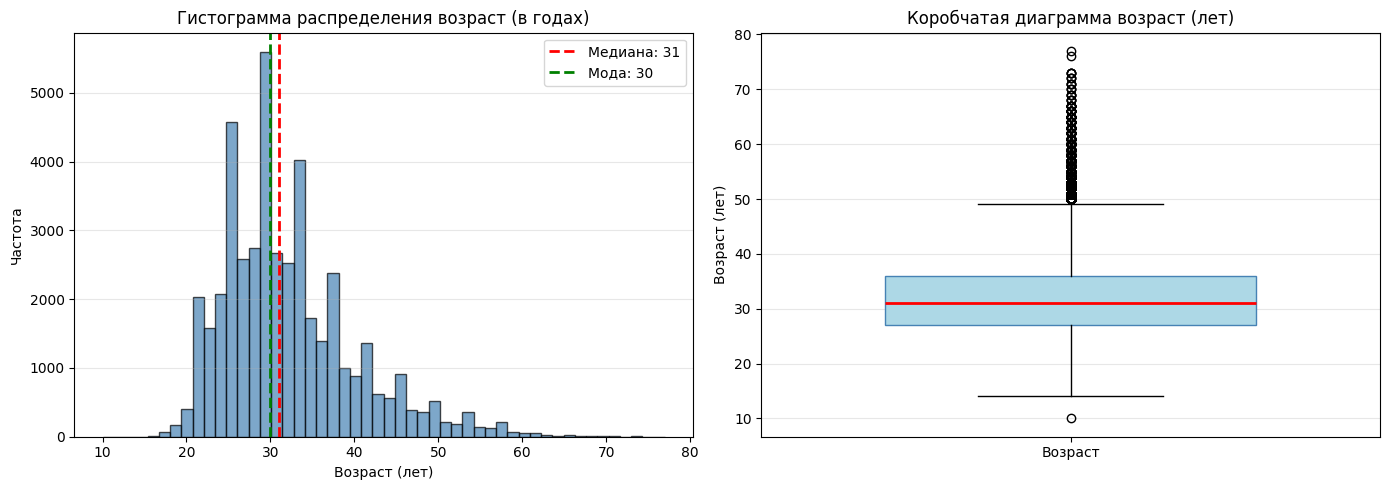

In [114]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма распределения
axes[0].hist(data['Возраст'].dropna(), bins=50, color='steelblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения возраст (в годах)', fontsize=12)
axes[0].set_xlabel('Возраст (лет)', fontsize=10)
axes[0].set_ylabel('Частота', fontsize=10)
axes[0].axvline(data['Возраст'].median(), color='red', linestyle='--', 
                linewidth=2, label=f'Медиана: {data["Возраст"].median():.0f}')
axes[0].axvline(data['Возраст'].mode()[0], color='green', linestyle='--', 
                linewidth=2, label=f'Мода: {data["Возраст"].mode()[0]:.0f}')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Коробчатая диаграмма
bp = axes[1].boxplot(data['Возраст'].dropna(), vert=True, patch_artist=True,
                     widths=0.6)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('steelblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
axes[1].set_title('Коробчатая диаграмма возраст (лет)', fontsize=12)
axes[1].set_ylabel('Возраст (лет)', fontsize=10)
axes[1].set_xticklabels(['Возраст'], fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/age_distribution.svg', dpi=150, bbox_inches='tight')
plt.show()

In [115]:
# Мода
mode_value = data['Возраст'].mode()[0]
print(f"\n1. МОДА РАСПРЕДЕЛЕНИЯ: {mode_value} лет")

# Предельные значения
min_age = data['Возраст'].min()
max_age = data['Возраст'].max()
print(f"\n2. ПРЕДЕЛЬНЫЕ ЗНАЧЕНИЯ:")
print(f"   - Минимальное значение: {min_age} лет")
print(f"   - Максимальное значение: {max_age} лет")


# Анализ выбросов
q1 = data['Возраст'].quantile(0.25)
q3 = data['Возраст'].quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
total_count = data['Возраст'].notna().sum()
outliers_low = data[data['Возраст'] < lower_bound]
outliers_high = data[data['Возраст'] > upper_bound]
normal_count = total_count - len(outliers_low) - len(outliers_high)

print(f"\n3. АНАЛИЗ ВЫБРОСОВ:")
print(f"   - Всего записей с возрастом: {total_count}")
print(f"   - Нормальных значений: {normal_count} ({normal_count/total_count*100:.1f}%)")
print(f"   - Выбросов снизу (< {lower_bound:.0f} лет): {len(outliers_low)} ({len(outliers_low)/total_count*100:.2f}%)")
print(f"   - Выбросов сверху (> {upper_bound:.0f} лет): {len(outliers_high)} ({len(outliers_high)/total_count*100:.2f}%)")




1. МОДА РАСПРЕДЕЛЕНИЯ: 30 лет

2. ПРЕДЕЛЬНЫЕ ЗНАЧЕНИЯ:
   - Минимальное значение: 10 лет
   - Максимальное значение: 77 лет

3. АНАЛИЗ ВЫБРОСОВ:
   - Всего записей с возрастом: 44744
   - Нормальных значений: 42970 (96.0%)
   - Выбросов снизу (< 14 лет): 1 (0.00%)
   - Выбросов сверху (> 50 лет): 1773 (3.96%)


### **Вывод**

Мода распределения составляет 30 лет. Это означает, что наиболее часто встречающийся возраст соискателей — 30 лет. Аномалии распределены следующим образом: Возраст < 14 лет: 1 резюме,  - Возраст > 50 лет: 1773 резюме. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

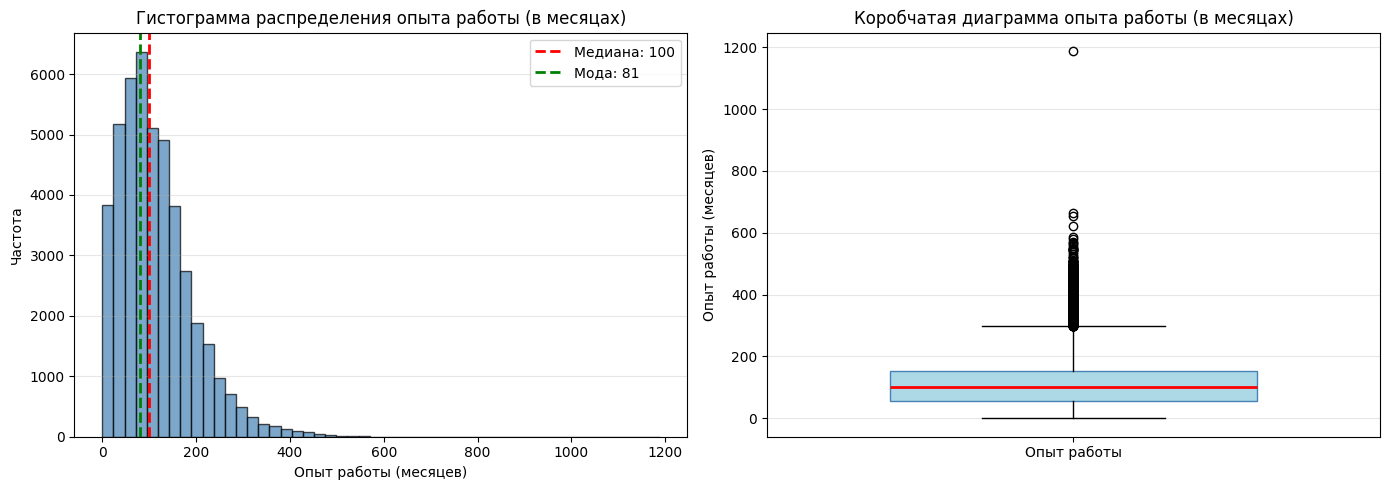

In [116]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма распределения
axes[0].hist(data['Опыт работы (месяц)'].dropna(), bins=50, color='steelblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения опыта работы (в месяцах)', fontsize=12)
axes[0].set_xlabel('Опыт работы (месяцев)', fontsize=10)
axes[0].set_ylabel('Частота', fontsize=10)
axes[0].axvline(data['Опыт работы (месяц)'].median(), color='red', linestyle='--', 
                linewidth=2, label=f'Медиана: {data["Опыт работы (месяц)"].median():.0f}')
axes[0].axvline(data['Опыт работы (месяц)'].mode()[0], color='green', linestyle='--', 
                linewidth=2, label=f'Мода: {data["Опыт работы (месяц)"].mode()[0]:.0f}')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Коробчатая диаграмма
bp = axes[1].boxplot(data['Опыт работы (месяц)'].dropna(), vert=True, patch_artist=True,
                     widths=0.6)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('steelblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
axes[1].set_title('Коробчатая диаграмма опыта работы (в месяцах)', fontsize=12)
axes[1].set_ylabel('Опыт работы (месяцев)', fontsize=10)
axes[1].set_xticklabels(['Опыт работы'], fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/experience_distribution.svg', dpi=150, bbox_inches='tight')
plt.show()

In [117]:
# Основные значения
min_exp = data['Опыт работы (месяц)'].min()
max_exp = data['Опыт работы (месяц)'].max()
median_exp = data['Опыт работы (месяц)'].median()
mode_value = data['Опыт работы (месяц)'].mode()[0]
mean_value = round(data['Опыт работы (месяц)'].mean(), 1)  
print(f"\n1. ОСНОВНЫЕ ЗНАЧЕНИЯ:")
print(f"   - Минимальное значение: {min_exp} месяцев ({min_exp/12:.1f} лет)")
print(f"   - Максимальное значение: {max_exp} месяцев ({max_exp/12:.1f} лет)")
print(f"   - Медиана: {median_exp} месяцев ({median_exp/12:.1f} лет)")
print(f"   - Мода: {mode_value} месяцев ({mode_value/12:.1f} лет)")
print(f"   - Среднее: {mean_value} месяцев ({mean_value/12:.1f} лет)")

# Интервал, где находится большинство соискателей
q1 = data['Опыт работы (месяц)'].quantile(0.25)
q3 = data['Опыт работы (месяц)'].quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
print(f"\n2. ИНТЕРВАЛ ОСНОВНОЙ МАССЫ СОИСКАТЕЛЕЙ:")
print(f"   - Границы выбросов по методу 1.5*IQR: [{lower_bound:.0f}, {upper_bound:.0f}] месяцев")
print(f"   - Опыт работы большинства соискателей: [{q1:.0f}, {q3:.0f}] месяцев ({(q1/12):.1f} - {(q3/12):.1f} лет)")

# Анализ выбросов
total_count = data['Опыт работы (месяц)'].notna().sum()
outliers_low = data[data['Опыт работы (месяц)'] < lower_bound]
outliers_high = data[data['Опыт работы (месяц)'] > upper_bound]
normal_count = total_count - len(outliers_low) - len(outliers_high)

print(f"\n3. АНАЛИЗ ВЫБРОСОВ:")
print(f"   - Всего записей с опытом работы: {total_count}")
print(f"   - Нормальных значений: {normal_count} ({normal_count/total_count*100:.1f}%)")
print(f"   - Выбросов снизу (< {lower_bound:.0f} мес.): {len(outliers_low)} ({len(outliers_low)/total_count*100:.2f}%)")
print(f"   - Выбросов сверху (> {upper_bound:.0f} мес.): {len(outliers_high)} ({len(outliers_high)/total_count*100:.2f}%)")


1. ОСНОВНЫЕ ЗНАЧЕНИЯ:
   - Минимальное значение: 0.0 месяцев (0.0 лет)
   - Максимальное значение: 1188.0 месяцев (99.0 лет)
   - Медиана: 100.0 месяцев (8.3 лет)
   - Мода: 81.0 месяцев (6.8 лет)
   - Среднее: 114.4 месяцев (9.5 лет)

2. ИНТЕРВАЛ ОСНОВНОЙ МАССЫ СОИСКАТЕЛЕЙ:
   - Границы выбросов по методу 1.5*IQR: [0, 300] месяцев
   - Опыт работы большинства соискателей: [57, 154] месяцев (4.8 - 12.8 лет)

3. АНАЛИЗ ВЫБРОСОВ:
   - Всего записей с опытом работы: 44576
   - Нормальных значений: 43300 (97.1%)
   - Выбросов снизу (< 0 мес.): 0 (0.00%)
   - Выбросов сверху (> 300 мес.): 1276 (2.86%)


### **Вывод**

Мода распределения составляет 81.0 месяцев (6.8 лет) лет. Это означает, что наиболее часто встречающееся значение опыта работы - примерно 7 лет. В диапазоне 57 - 154 месяцев (4.8 - 12.8 лет) находится ~50% всех соискателей. Обнаружено 1276 выбросов сверху. Значения опыта работы более 300 месяцев (25.0 лет) можно считать аномальными. Максимальное значение в 99 лет 
выглядит особенно подозрительным - это может быть ошибкой ввода данных или указание нереально большого опыта работы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


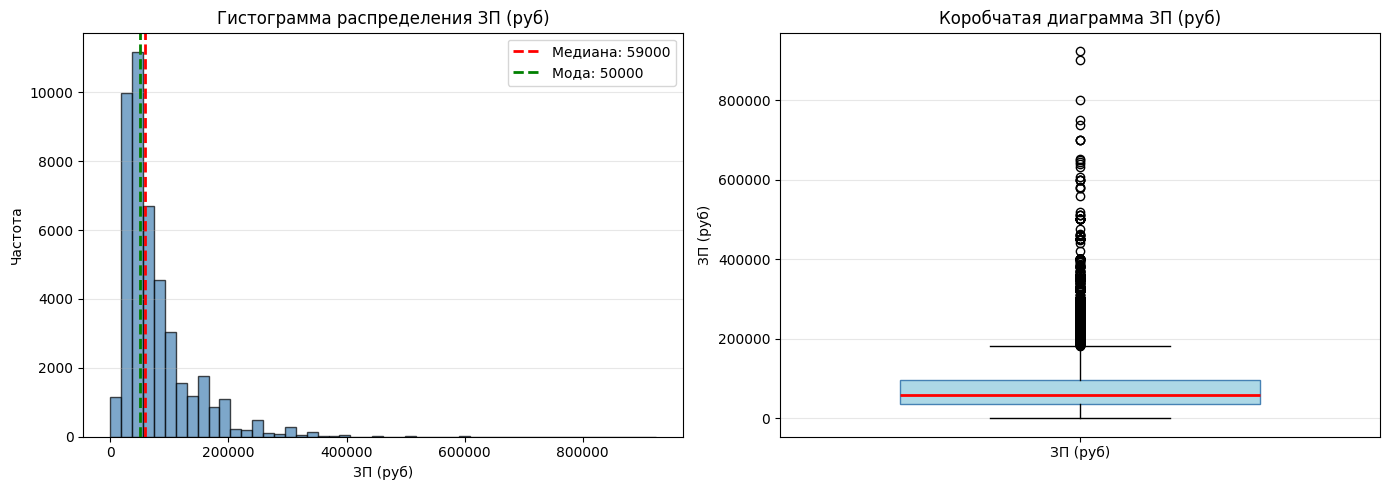

In [118]:
# Фильтруем данные (зарплата меньше 1 млн рублей для лучшей визуализации)
salary_filtered = data[(data['ЗП (руб)'] > 0) & (data['ЗП (руб)'] < 1_000_000)]['ЗП (руб)']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма распределения
axes[0].hist(salary_filtered, bins=50, color='steelblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_title('Гистограмма распределения ЗП (руб)', fontsize=12)
axes[0].set_xlabel('ЗП (руб)', fontsize=10)
axes[0].set_ylabel('Частота', fontsize=10)

# Медиана и мода
median_val = salary_filtered.median()
mode_val = salary_filtered.mode()[0]

axes[0].axvline(median_val, color='red', linestyle='--', 
                linewidth=2, label=f'Медиана: {median_val:.0f}')
axes[0].axvline(mode_val, color='green', linestyle='--', 
                linewidth=2, label=f'Мода: {mode_val:.0f}')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Коробчатая диаграмма
bp = axes[1].boxplot(salary_filtered, vert=True, patch_artist=True,
                     widths=0.6)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('steelblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
axes[1].set_title('Коробчатая диаграмма ЗП (руб)', fontsize=12)
axes[1].set_ylabel('ЗП (руб)', fontsize=10)
axes[1].set_xticklabels(['ЗП (руб)'], fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/salary_distribution.svg', dpi=150, bbox_inches='tight')
plt.show()

In [119]:
# Мода
mode_value = salary_filtered.mode()[0]
print(f"\n1. МОДА РАСПРЕДЕЛЕНИЯ: {mode_value:.0f} руб.")

# Предельные значения
min_salary = salary_filtered.min()
max_salary = salary_filtered.max()
print(f"\n2. ПРЕДЕЛЬНЫЕ ЗНАЧЕНИЯ:")
print(f"   - Минимальное значение: {min_salary:.0f} руб.")
print(f"   - Максимальное значение: {max_salary:.0f} руб.")

# Медиана
median_salary = salary_filtered.median()
print(f"\n3. МЕДИАНА: {median_salary:.0f} руб.")

# Анализ выбросов
q1 = salary_filtered.quantile(0.25)
q3 = salary_filtered.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = salary_filtered[(salary_filtered < lower_bound) | (salary_filtered > upper_bound)]
print(f"\n4. ВЫБРОСЫ:")
print(f"   - Верхняя граница выбросов: {upper_bound:.0f} руб.")
print(f"   - Количество выбросов: {len(outliers)} ({len(outliers)/len(salary_filtered)*100:.1f}%)")


1. МОДА РАСПРЕДЕЛЕНИЯ: 50000 руб.

2. ПРЕДЕЛЬНЫЕ ЗНАЧЕНИЯ:
   - Минимальное значение: 1 руб.
   - Максимальное значение: 923983 руб.

3. МЕДИАНА: 59000 руб.

4. ВЫБРОСЫ:
   - Верхняя граница выбросов: 182000 руб.
   - Количество выбросов: 2775 (6.2%)


### **Вывод**

Мода распределения составляет 50 000 руб. Медиана (~59 тыс.). Большинство соискателей желают зарплату 50-70 тыс. руб.  Количество выбросов: 2775 (6.2%). Есть аномально высокие значения (до нескольких млн руб.).


In [120]:
# Считаем соискателей с зарплатой выше 1 миллиона
high_salary = data[data['ЗП (руб)'] > 1_000_000]

print(f"Количество соискателей с ЗП выше 1 млн руб.: {len(high_salary)}")

# Проверяем распределение
print("\nРаспределение ЗП выше 1 млн:")
print(high_salary['ЗП (руб)'].describe())



Количество соискателей с ЗП выше 1 млн руб.: 5

Распределение ЗП выше 1 млн:
count    5.000000e+00
mean     7.846020e+06
std      9.488788e+06
min      1.750000e+06
25%      2.500000e+06
50%      3.000000e+06
75%      7.675224e+06
max      2.430488e+07
Name: ЗП (руб), dtype: float64


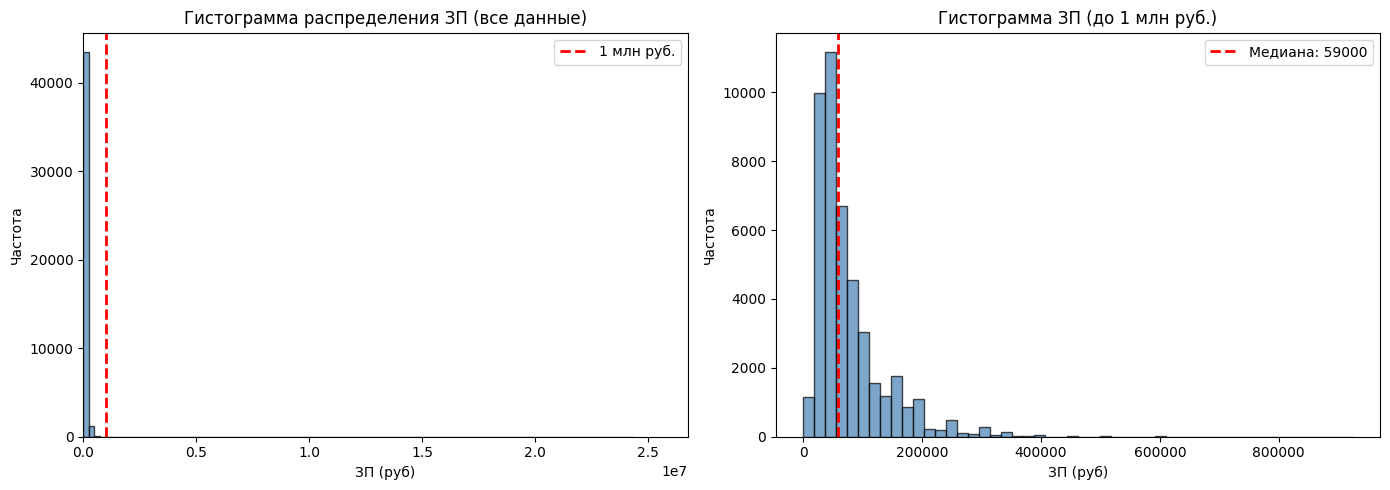

In [121]:
# Строим график с включением всех данных для наглядности
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма всех данных
axes[0].hist(data['ЗП (руб)'].dropna(), bins=100, color='steelblue', 
             edgecolor='black', alpha=0.7)
axes[0].axvline(1_000_000, color='red', linestyle='--', linewidth=2, 
                label='1 млн руб.')
axes[0].set_title('Гистограмма распределения ЗП (все данные)', fontsize=12)
axes[0].set_xlabel('ЗП (руб)', fontsize=10)
axes[0].set_ylabel('Частота', fontsize=10)
axes[0].legend(fontsize=10)
axes[0].set_xlim(0, data['ЗП (руб)'].max() * 1.1)

# Гистограмма с фильтром для лучшей визуализации основной массы
salary_filtered = data[data['ЗП (руб)'] < 1_000_000]['ЗП (руб)']
axes[1].hist(salary_filtered, bins=50, color='steelblue', 
             edgecolor='black', alpha=0.7)
axes[1].set_title('Гистограмма ЗП (до 1 млн руб.)', fontsize=12)
axes[1].set_xlabel('ЗП (руб)', fontsize=10)
axes[1].set_ylabel('Частота', fontsize=10)
axes[1].axvline(salary_filtered.median(), color='red', linestyle='--', 
                linewidth=2, label=f'Медиана: {salary_filtered.median():.0f}')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('visualizations/salary_distribution_comparison.svg', dpi=150, bbox_inches='tight')
plt.show()

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [122]:
# Фильтруем данные (зарплата меньше 1 млн рублей)
data_filtered = data[data['ЗП (руб)'] < 1000000]

# Группируем по образованию и считаем медиану
median_by_education = data_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

print(f"\nМедианная ЗП в тыс. руб.:")
print(median_by_education / 1000)


Медианная ЗП в тыс. руб.:
Образование
Высшее образование     60.0
Неоконченное высшее    50.0
Среднее образование    40.0
Среднее специальное    40.0
Name: ЗП (руб), dtype: float64


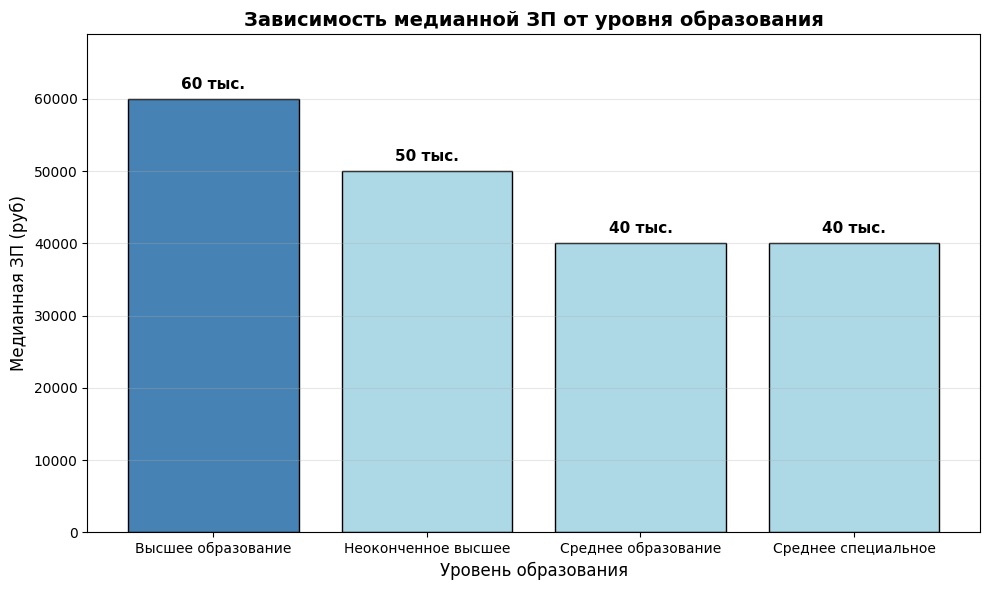

In [123]:
# Строим диаграмму
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['steelblue', 'lightblue', 'lightblue', 'lightblue']
bars = ax.bar(median_by_education.index, median_by_education.values, color=colors, edgecolor='black')

# Добавляем значения на столбцы
for bar, val in zip(bars, median_by_education.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
            f'{val/1000:.0f} тыс.', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Зависимость медианной ЗП от уровня образования', fontsize=14, fontweight='bold')
ax.set_xlabel('Уровень образования', fontsize=12)
ax.set_ylabel('Медианная ЗП (руб)', fontsize=12)
ax.set_ylim(0, median_by_education.max() * 1.15)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/median_salary_by_education.svg', dpi=150, bbox_inches='tight')
plt.show()

In [124]:
# В процентах относительно наименьшего
min_education = median_by_education.min()
print("Разница в % относительно наименьшего:")
for edu, salary in median_by_education.items():
    diff = (salary - min_education) / min_education * 100
    print(f"  {edu}: {salary/1000:.0f} тыс. руб. ({diff:+.0f}%)")

Разница в % относительно наименьшего:
  Высшее образование: 60 тыс. руб. (+50%)
  Неоконченное высшее: 50 тыс. руб. (+25%)
  Среднее образование: 40 тыс. руб. (+0%)
  Среднее специальное: 40 тыс. руб. (+0%)


In [125]:
# Наибольший уровень ЗП
max_edu = median_by_education.idxmax()
max_salary = median_by_education.max()
print(f"\n1. НАИБОЛЬШАЯ медианная ЗП:")
print(f"   - Уровень образования: {max_edu}")
print(f"   - Медианная ЗП: {max_salary/1000:.0f} тыс. руб.")

# Наименьший уровень ЗП
min_edu = median_by_education.idxmin()
min_salary = median_by_education.min()
print(f"\n2. НАИМЕНЬШАЯ медианная ЗП:")
print(f"   - Уровень образования: {min_edu}")
print(f"   - Медианная ЗП: {min_salary/1000:.0f} тыс. руб.")

# Разница
diff = (max_salary - min_salary) / min_salary * 100
print(f"\n3. РАЗНИЦА между наибольшей и наименьшей:")
print(f"   - {diff:.0f}%")


1. НАИБОЛЬШАЯ медианная ЗП:
   - Уровень образования: Высшее образование
   - Медианная ЗП: 60 тыс. руб.

2. НАИМЕНЬШАЯ медианная ЗП:
   - Уровень образования: Среднее образование
   - Медианная ЗП: 40 тыс. руб.

3. РАЗНИЦА между наибольшей и наименьшей:
   - 50%


### **Вывод**

Наибольшая медианная ЗП характерна для обладателей высшего образования - 60 тыс. руб.. Наименьшая медианная ЗП характерна для обладателей среднего образования - 40 тыс. руб.. Признак образования важен при прогнозировании зарплаты, так как разница между ожидаемой ЗП для соискателей с высшим и средним образованием составляет 50%. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [126]:
# Фильтруем данные (зарплата меньше 1 млн рублей)
data_filtered = data[data['ЗП (руб)'] < 1_000_000].copy()

# Статистики по городам
print("Статистики по городам:")
city_stats = data_filtered.groupby('Город')['ЗП (руб)'].agg(['median', 'mean', 'std', 'count'])
city_stats = city_stats.sort_values('median', ascending=False)
print(city_stats)

Статистики по городам:
                   median           mean           std  count
Город                                                        
Москва            85000.0  108596.866199  72939.173309  16617
Санкт-Петербург   60000.0   72095.765813  46255.801180   4937
город миллионник  40000.0   51575.930784  35333.881460   7332
другие            40000.0   53339.702540  40124.303906  15852


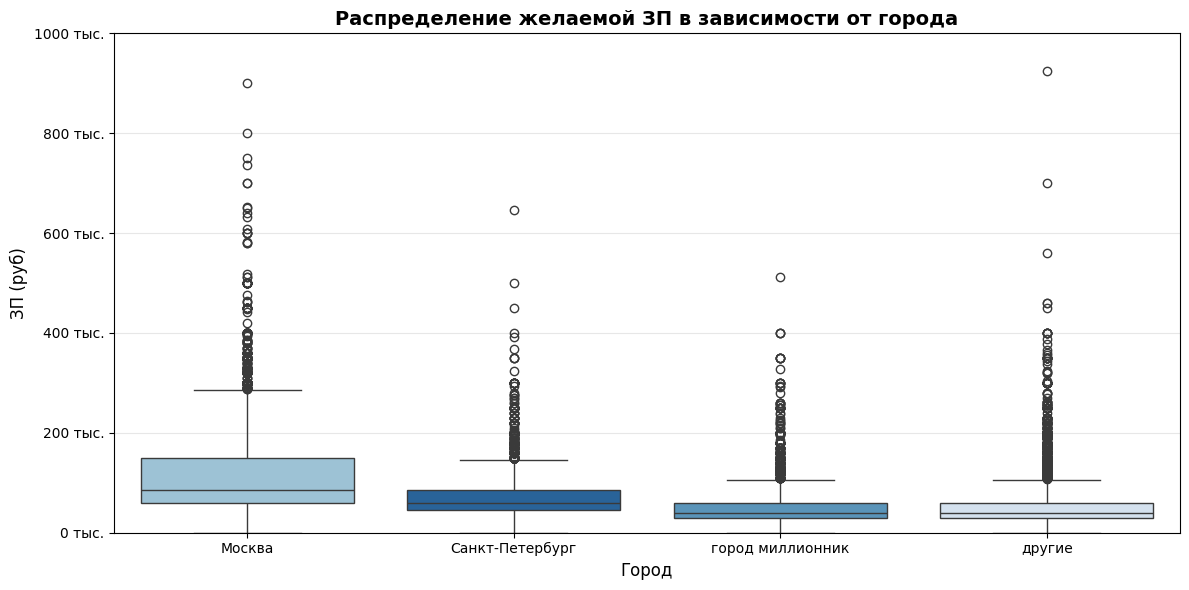

In [127]:
# Фильтруем данные (зарплата меньше 1 млн рублей)
data_filtered = data[data['ЗП (руб)'] < 1_000_000].copy()

# Строим коробчатую диаграмму
fig, ax = plt.subplots(figsize=(12, 6))

# Порядок городов по медианной ЗП
city_order = data_filtered.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False).index

# Коробчатая диаграмма (исправлено)
box = sns.boxplot(
    data=data_filtered, 
    x='Город', 
    y='ЗП (руб)',
    order=city_order,
    hue='Город',           # Добавлено: указываем hue
    palette='Blues',
    legend=False,          # Добавлено: убираем легенду
    ax=ax
)

ax.set_title('Распределение желаемой ЗП в зависимости от города', fontsize=14, fontweight='bold')
ax.set_xlabel('Город', fontsize=12)
ax.set_ylabel('ЗП (руб)', fontsize=12)
ax.set_ylim(0, 1_000_000)  # Ограничение в 1 млн рублей
ax.grid(axis='y', alpha=0.3)

# Форматируем ось Y в тыс. рублей
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f} тыс.'))

plt.tight_layout()
plt.savefig('visualizations/salary_by_city.svg', dpi=150, bbox_inches='tight')
plt.show()

In [128]:
# Медианные уровни ЗП по городам
print("\n1. МЕДИАННЫЕ УРОВНИ ЗП ПО ГОРОДАМ:")
median_by_city = data_filtered.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False)
for city, median in median_by_city.items():
    print(f"   - {city}: {median/1000:.0f} тыс. руб.")

# Размах (IQR) по городам
print("\n2. РАЗМАХ (IQR) ПО ГОРОДАМ:")
for city in median_by_city.index:
    city_data = data_filtered[data_filtered['Город'] == city]['ЗП (руб)']
    q1 = city_data.quantile(0.25)
    q3 = city_data.quantile(0.75)
    iqr = q3 - q1
    print(f"   - {city}: [{q1/1000:.0f}, {q3/1000:.0f}] тыс. руб. (IQR: {iqr/1000:.0f} тыс.)")

# Разница между Москвой и другими городами
moscow_median = median_by_city.get('Москва', 0)
other_median = median_by_city.drop('Москва', errors='ignore').max()
print(f"\n3. РАЗНИЦА МЕЖДУ МОСКВОЙ И СЛЕДУЮЩИМ ГОРОДОМ:")
print(f"   - Москва: {moscow_median/1000:.0f} тыс. руб.")
print(f"   - Следующий город: {other_median/1000:.0f} тыс. руб.")
print(f"   - Разница: {(moscow_median - other_median)/1000:.0f} тыс. руб.")





1. МЕДИАННЫЕ УРОВНИ ЗП ПО ГОРОДАМ:
   - Москва: 85 тыс. руб.
   - Санкт-Петербург: 60 тыс. руб.
   - город миллионник: 40 тыс. руб.
   - другие: 40 тыс. руб.

2. РАЗМАХ (IQR) ПО ГОРОДАМ:
   - Москва: [60, 150] тыс. руб. (IQR: 90 тыс.)
   - Санкт-Петербург: [45, 85] тыс. руб. (IQR: 40 тыс.)
   - город миллионник: [30, 60] тыс. руб. (IQR: 30 тыс.)
   - другие: [30, 60] тыс. руб. (IQR: 30 тыс.)

3. РАЗНИЦА МЕЖДУ МОСКВОЙ И СЛЕДУЮЩИМ ГОРОДОМ:
   - Москва: 85 тыс. руб.
   - Следующий город: 60 тыс. руб.
   - Разница: 25 тыс. руб.


In [129]:
# Проверяем максимальные значения 
print("Максимальные значения ЗП по городам:")
for city in city_order:
    max_val = data_filtered[data_filtered['Город'] == city]['ЗП (руб)'].max()
    print(f"   - {city}: {max_val/1000:.0f} тыс. руб.")

Максимальные значения ЗП по городам:
   - Москва: 900 тыс. руб.
   - Санкт-Петербург: 645 тыс. руб.
   - город миллионник: 512 тыс. руб.
   - другие: 924 тыс. руб.


### **Вывод**

Медианные уровни ЗП распредены следующим образом:
- Москва: 85 тыс. руб.
- Санкт-Петербург: 60 тыс. руб.
- город миллионник: 40 тыс. руб.
- другие: 40 тыс. руб.

Размах в желаемой ЗП в Москве самый большой (90 тыс.руб.). В Санкт-Петербурге размах 40 тыс. руб., в городах миллионниках и других городах - 30 тыс.руб. 

Так как разница в желаемой ЗП у соискателей между Москвой и регионами 30-50%, то признак города следуют включить в модель при прогнозировании заработной платы.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [130]:
data.columns

Index(['Ищет работу на должность:', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)',
       'Готовность к переезду', 'Готовность к командировкам', 'Город',
       'волонтерство', 'полная занятость', 'проектная работа', 'стажировка',
       'частичная занятость', 'вахтовый метод', 'гибкий график', 'полный день',
       'сменный график', 'удаленная работа', 'ЗП (руб)'],
      dtype='object')

In [131]:
# Фильтруем данные
data_filtered = data[data['ЗП (руб)'] < 1_000_000].copy()

# Создаём сводную таблицу
pivot_table = data_filtered.pivot_table(
    values='ЗП (руб)',
    index='Готовность к переезду',
    columns='Готовность к командировкам',
    aggfunc='median'
)

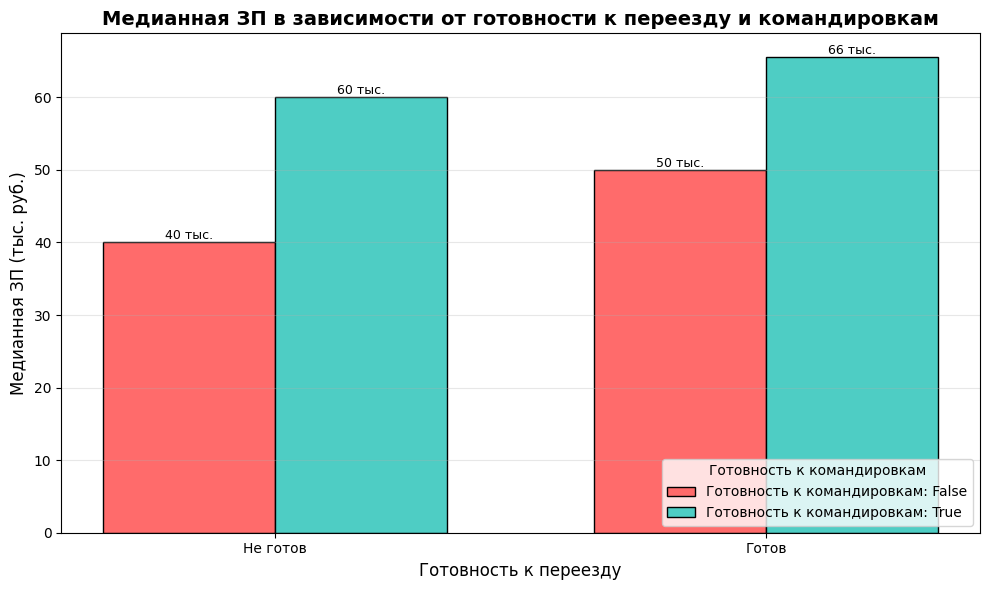

In [132]:
# Строим график на основе сводной таблицы
fig, ax = plt.subplots(figsize=(10, 6))

relocation_values = [False, True]
commutation_values = [False, True]

x = np.arange(len(relocation_values))
width = 0.35

colors_commutation = ['#ff6b6b', '#4ecdc4']

for i, commutation in enumerate(commutation_values):
    # Берём значения из сводной таблицы
    values = [pivot_table.loc[r, commutation] for r in relocation_values]
    
    bars = ax.bar(x + i * width - width/2, np.array(values) / 1000, width, 
                  label=f'Готовность к командировкам: {commutation}',
                  color=colors_commutation[i], edgecolor='black')

ax.set_xlabel('Готовность к переезду', fontsize=12)
ax.set_ylabel('Медианная ЗП (тыс. руб.)', fontsize=12)
ax.set_title('Медианная ЗП в зависимости от готовности к переезду и командировкам', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Не готов', 'Готов'])
ax.legend(title='Готовность к командировкам', loc='lower right')
ax.grid(axis='y', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f тыс.', fontsize=9)

plt.tight_layout()
plt.savefig('visualizations/salary_by_relocation_and_commutation.svg', dpi=150, bbox_inches='tight')
plt.show()

In [133]:
print("\nВ тыс. руб.:")
pivot_print = pd.DataFrame(round(pivot_table / 1000, 0))
print(pivot_print)


В тыс. руб.:
Готовность к командировкам  False  True 
Готовность к переезду                   
False                        40.0   60.0
True                         50.0   66.0


In [134]:
print(f"\n1. МАКСИМАЛЬНАЯ МЕДИАННАЯ ЗП:")
print(f"   - Категория: Готов к переезду + Готов к командировкам")
print(f"   - Значение: {pivot_table.loc[True, True]/1000:.0f} тыс. руб.")

print(f"\n2. МИНИМАЛЬНАЯ МЕДИАННАЯ ЗП:")
print(f"   - Категория: Не готов к переезду + Не готов к командировкам")
print(f"   - Значение: {pivot_table.loc[False, False]/1000:.0f} тыс. руб.")


1. МАКСИМАЛЬНАЯ МЕДИАННАЯ ЗП:
   - Категория: Готов к переезду + Готов к командировкам
   - Значение: 66 тыс. руб.

2. МИНИМАЛЬНАЯ МЕДИАННАЯ ЗП:
   - Категория: Не готов к переезду + Не готов к командировкам
   - Значение: 40 тыс. руб.


### **Вывод**
Рейтинг ожидаемой медианной ЗП по категориям (в тыс. руб.):
```
1    Готов к переезду + Готов к командировкам      66
2    Не готов к переезду + Готов к командировкам   60
3    Готов к переезду + Не готов к командировкам   50
4    Не готов к переезду + Не готов к командировкам 40
```


Максимальная медианная ЗП в категории Готов к переезду + Готов к командировкам (66 тыс. руб.).

Минимальная медианная ЗП в категории Не готов к переезду + Не готов к командировкам (40 тыс. руб.).



7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [135]:
# Создаём копию данных, чтобы избежать SettingWithCopyWarning
data_filtered = data[data['ЗП (руб)'] < 1_000_000].copy()

# Группируем возраст в категории
data_filtered['Возраст_категория'] = pd.cut(
    data_filtered['Возраст'],
    bins=[0, 25, 30, 35, 40, 50, 60, 100],
    labels=['18-25', '26-30', '31-35', '36-40', '41-50', '51-60', '60+']
)

# Новая сводная таблица (с observed=True для избавления от FutureWarning)
pivot_table_cat = data_filtered.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст_категория',
    aggfunc='median',
    observed=True
)


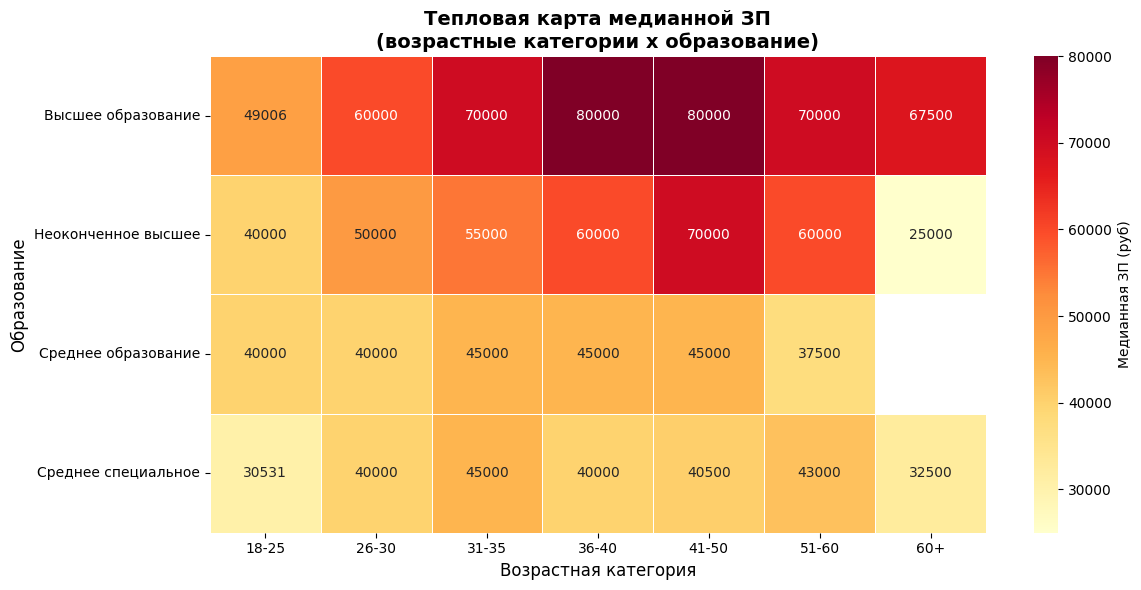

In [136]:
# Тепловая карта
fig, ax = plt.subplots(figsize=(12, 6))

heatmap = sns.heatmap(
    pivot_table_cat, 
    annot=True, 
    fmt='.0f', 
    cmap='YlOrRd',
    linewidths=0.5,
    ax=ax,
    cbar_kws={'label': 'Медианная ЗП (руб)'}
)

ax.set_title('Тепловая карта медианной ЗП\n(возрастные категории x образование)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Возрастная категория', fontsize=12)
ax.set_ylabel('Образование', fontsize=12)

plt.tight_layout()
plt.savefig('visualizations/heatmap_salary_age_categories.svg', dpi=150, bbox_inches='tight')
plt.show()

### **Вывод**

1.  Влияние образования:
   - Высшее образование → самая высокая ЗП во всех возрастных группах
   - Среднее образование → самая низкая ЗП

2.  Влияние возраста:
   - Пик ЗП приходится на возраст 30-45 лет
   - Молодые (18-25) и пожилые (50+) ожидают меньшую ЗП

3.  Взаимодействие факторов:
   - Высшее образование + средний возраст = максимальная ЗП
   - Среднее образование + молодой возраст = минимальная ЗП

При прочих равных, соискатель с высшим образованием в возрасте 30-45 лет будет ожидать самую высокую заработную плату.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [137]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [138]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [139]:
# Шаг 1: Находим полные дубликаты
duplicates = data[data.duplicated(keep=False)]
print(f"Всего строк, участвующих в дубликатах: {len(duplicates)}")

# Шаг 2: Находим количество уникальных дублирующихся строк
duplicate_rows = data[data.duplicated(keep='first')]
print(f"Количество дубликатов (строк для удаления): {len(duplicate_rows)}")

Всего строк, участвующих в дубликатах: 322
Количество дубликатов (строк для удаления): 161


In [140]:
# Шаг 3: Удаляем дубликаты
data_no_duplicates = data.drop_duplicates()

In [141]:
print(f"Количество полных дубликатов: {len(duplicate_rows)}")

Количество полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [142]:
# Подсчёт пропусков в каждом столбце
missing_info = data.isnull().sum()

# Создаём DataFrame с информацией о пропусках
missing_df = pd.DataFrame({
    'Количество пропусков': missing_info,
    })

# Фильтруем только столбцы с пропусками
missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values(
    'Количество пропусков', ascending=False
)

print("Информация о пропусках в столбцах:")
print("=" * 60)
print(missing_df)

Информация о пропусках в столбцах:
                                 Количество пропусков
Опыт работы (месяц)                               168
Последняя/нынешняя должность                        2
Последнее/нынешнее место работы                     1


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [143]:
# Шаг 1: Сохраняем исходное количество строк
initial_count = len(data)


# Шаг 2: Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])


print(f"Удалено строк: {initial_count - len(data)}")

Удалено строк: 2


In [144]:
# Заполняем пропуски в "Опыт работы (месяц)" медианным значением
median_experience = data['Опыт работы (месяц)'].median()

data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(median_experience)

print(f"Пропусков после заполнения: {data['Опыт работы (месяц)'].isnull().sum()}")

Пропусков после заполнения: 0


In [145]:
print('Среднее значение опыта работы после заполнения пропусков', round(data['Опыт работы (месяц)'].mean(),0))

Среднее значение опыта работы после заполнения пропусков 114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [146]:
# Находим индексы выбросов
outliers_mask = (data['ЗП (руб)'] > 1_000_000) | (data['ЗП (руб)'] < 1_000)
outliers_indices = data[outliers_mask].index

print(f"Найдено выбросов: {len(outliers_indices)} резюме")

# Удаляем выбросы через drop()
data = data.drop(index=outliers_indices)



Найдено выбросов: 89 резюме


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [147]:
# Вычисляем опыт работы в годах
data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12

#  Находим строки, где опыт > возраст
anomaly_mask = data['Опыт работы (год)'] > data['Возраст']
anomaly_indices = data[anomaly_mask].index
print(f"Найдено выбросов: {len(anomaly_indices)} резюме")
# Удаляем аномалии через drop()
data = data.drop(index=anomaly_indices)

Найдено выбросов: 7 резюме


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [148]:
# ваш код здесь

ваш коммментарий здесь